In [1]:
%pip install -q git+https://github.com/rvanasa/pandas-gpt

from IPython.display import clear_output, display
clear_output()

In [3]:
import os
from IPython.display import clear_output
if not os.environ.get('OPENAI_API_KEY'):
  os.environ['OPENAI_API_KEY'] = input('Enter API key from (https://platform.openai.com/account/api-keys): ')
  clear_output()

In [16]:
import pandas as pd
import pandas_gpt

df = pd.read_csv('https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977


In [19]:
df.ask('remove PII')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A..."
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901"
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368"
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177"
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529"
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318"
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ..."
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6..."


In [25]:
df.ask('filter by products purchased in Laurenchester, NY', verbose=True)


```python
import pandas as pd

def process(df):
    return df[df['Purchase Address'].apply(lambda x: 'Laurenchester, NY' in x)]
```


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,Zip Code
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684,NY
140484,276018,Google Phone,1.0,600.00,10/24/19 01:46,"78382 Noah Stream Suite 585, North Laurenchest...",8086-9573-0018-6582,306-25-7380,NY


In [26]:
df.ask.code('add a new Category column with value "cheap", "regular", or "expensive"')

import pandas as pd

def process(df):
    
    def get_category(price):
        if price < 50:
            return "cheap"
        elif price < 100:
            return "regular"
        else:
            return "expensive"
        
    df["Category"] = df["Price Each"].apply(get_category)
    
    return df



In [27]:
df.ask('add a new Category column with value "cheap", "regular", or "expensive"')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,Zip Code,Category
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008,AZ,expensive
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892,TX,cheap
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943,CO,cheap
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684,NY,expensive
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977,SC,cheap
...,...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529",6330-9667-7648-5375,326-43-8038,VA,cheap
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318",7928-0521-1139-8895,802-83-9528,WI,cheap
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ...",8809-4349-6427-8935,157-00-6893,NY,expensive
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6...",0526-5467-8300-3974,714-39-2575,MO,cheap


In [28]:
df.ask('show the outliers as a table', verbose=True)


```python
import pandas as pd

def process(df):
    # calculate z-score for columns Quantity Ordered and Price Each
    # any value with a z-score greater than 3 is considered as an outlier
    df['Quantity Z-Score'] = (df['Quantity Ordered'] - df['Quantity Ordered'].mean()) / df['Quantity Ordered'].std()
    df['Price Z-Score'] = (df['Price Each'] - df['Price Each'].mean()) / df['Price Each'].std()
    outliers = df[(df['Quantity Z-Score'].abs() > 3) | (df['Price Z-Score'].abs() > 3)]
    return outliers[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Category']]

```


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Category
11,141245,Macbook Pro Laptop,1.0,1700.00,01/31/19 10:12,"1161 Thomas Track, North Kenneth, IL 62411",expensive
12,141246,AAA Batteries (4-pack),3.0,2.99,01/09/19 18:57,"36453 Nguyen Parkway, Port Williamport, PA 15559",cheap
52,141285,AAA Batteries (4-pack),3.0,2.99,01/14/19 14:13,"99554 Reed Forges Suite 336, Lake Christopher,...",cheap
55,141288,Macbook Pro Laptop,1.0,1700.00,01/19/19 08:17,"53609 Sherry Lake, East Stacy, KY 42286",expensive
58,141290,AA Batteries (4-pack),3.0,3.84,01/02/19 08:25,"950 Morgan Rue, Port Angela, MS 38824",cheap
...,...,...,...,...,...,...,...
185880,319602,AAA Batteries (4-pack),3.0,2.99,12/05/19 23:12,"40398 Samuel Keys Suite 694, East James, IL 60459",cheap
185885,319607,Macbook Pro Laptop,1.0,1700.00,12/25/19 20:07,"6065 Crane Mount, Lindseyhaven, FL 32311",expensive
185900,319622,Macbook Pro Laptop,1.0,1700.00,12/15/19 07:11,"754 Brittany Pine Suite 974, West Jerry, FL 32030",expensive
185918,319639,Macbook Pro Laptop,1.0,1700.00,12/20/19 10:56,"32708 Scott Street, West Logan, IL 61732",expensive


In [29]:
most_popular = df.ask('what are the top 10 most popular products, as a table')
most_popular

,Product,Quantity Ordered
1,AAA Batteries (4-pack),31017.0
2,AA Batteries (4-pack),27635.0
3,USB-C Charging Cable,23975.0
4,Lightning Charging Cable,23217.0
5,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,27in FHD Monitor,7550.0
9,iPhone,6849.0
10,27in 4K Gaming Monitor,6244.0


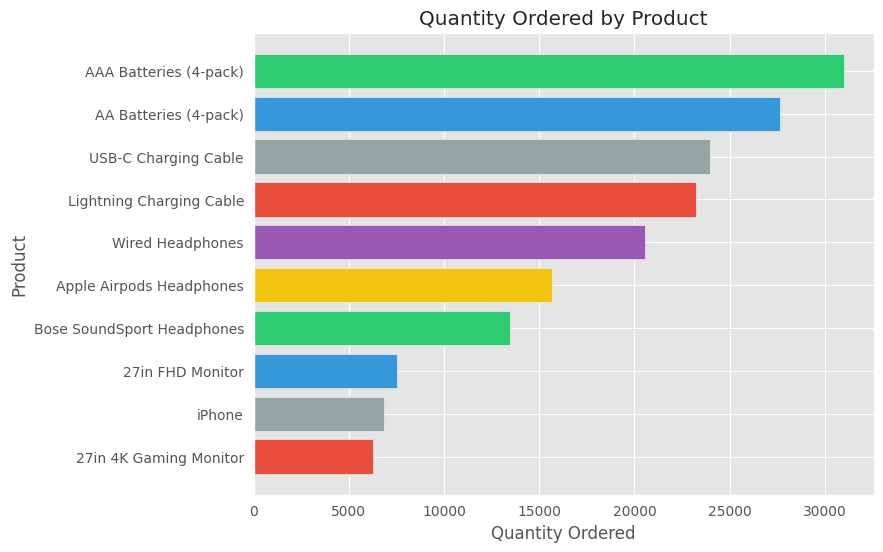

In [38]:
most_popular.ask('horizontal bar plot with colors')